In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset

try:
  df = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv', sep=';', quotechar='"', encoding='utf-8', engine='python')
  print("Dataset loaded successfully. Here's the head of the dataframe:")
  print(df.head())
except FileNotFoundError:
  print("CSV not found!")

Dataset loaded successfully. Here's the head of the dataframe:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Handle Duplicates

In [7]:
df.duplicated().sum()

np.int64(12)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

# Analyze the target column

In [10]:
df['y']

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [11]:
print(df['y'].value_counts())

# See it as percentage
print('\nTarget variable distribution (%): ')
print(df['y'].value_counts(normalize=True) * 100)

y
no     36537
yes     4639
Name: count, dtype: int64

Target variable distribution (%): 
y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64


# EDA - Categorical Features

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop through them and print them
for col in categorical_cols:
  print(f"\n--Analysis of Column: {col}---")
  print(df[col].value_counts())


--Analysis of Column: job---
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

--Analysis of Column: marital---
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

--Analysis of Column: education---
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

--Analysis of Column: default---
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

--Analysis of Column: housing---
housing
yes        21571
no         18615
unknown      990
Name: co

# Get a quick summary of all columns that contain "unknown" and see what percentage of each column is affected.

In [13]:
# Create summary of 'unknown' counts and percentages
unknown_counts = (df == 'unknown').sum()
unknown_percentages = 100 * unknown_counts / len(df)

# Combine them in new df for easy viewing
unknown_summary = pd.DataFrame({
    'Counts': unknown_counts,
    'Percentages': unknown_percentages
})
print(unknown_summary.sort_values(by='Percentages', ascending=False))

                Counts  Percentages
default           8596    20.876239
education         1730     4.201477
housing            990     2.404313
loan               990     2.404313
job                330     0.801438
marital             80     0.194288
age                  0     0.000000
contact              0     0.000000
month                0     0.000000
day_of_week          0     0.000000
duration             0     0.000000
campaign             0     0.000000
pdays                0     0.000000
previous             0     0.000000
poutcome             0     0.000000
emp.var.rate         0     0.000000
cons.price.idx       0     0.000000
cons.conf.idx        0     0.000000
euribor3m            0     0.000000
nr.employed          0     0.000000
y                    0     0.000000


-> As the percentage of unknowns in 'job' and 'marital' is negligible so we can drop these rows.

-> Whereas, 'housing' and 'loan' and ditto same number of unknowns. So, we can check that they might be the same columns. In that case we can treat unknown as a seperate feature.

# Verify 'housing' and 'loan' suspicious columns

In [14]:
matching_unknowns = df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')].shape[0]
print(f"Number of rows with both 'housing' and 'loan': {matching_unknowns}")

Number of rows with both 'housing' and 'loan': 990


As,this prints 990, it confirms they are the same people. This reinforces the idea that "unknown" is a specific group (e.g., "declined to answer personal finance questions") and should be kept as its own category.

Drop 'default' beacuse it is useless as only 3 people had a yes value and tons of unknown.

In [15]:
df = df.drop('default', axis=1)

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Drop rows from 'job' and 'marital' columns

In [17]:
df = df[df['job'] != 'unknown']
df = df[df['marital'] != 'unknown']

It first groups all the people by their job (e.g., all "blue-collar" together, all "management" together).

Find Mode: It then finds the most common education (the mode) within each job group.

For the "management" group, the mode might be university.degree.

For the "blue-collar" group, the mode might be basic.9y.

Fill: It fills the "unknown" education values only with the mode from their corresponding job group.

In [18]:
df['education'] = df['education'].replace('unknown', np.nan)

df['education'] = df.groupby('job')['education'].transform(lambda x: x.fillna(x.mode()[0]))

# EDA - Numerical Features

In [19]:
# Get a list of all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

--- Displaying Histograms for Numerical Columns ---


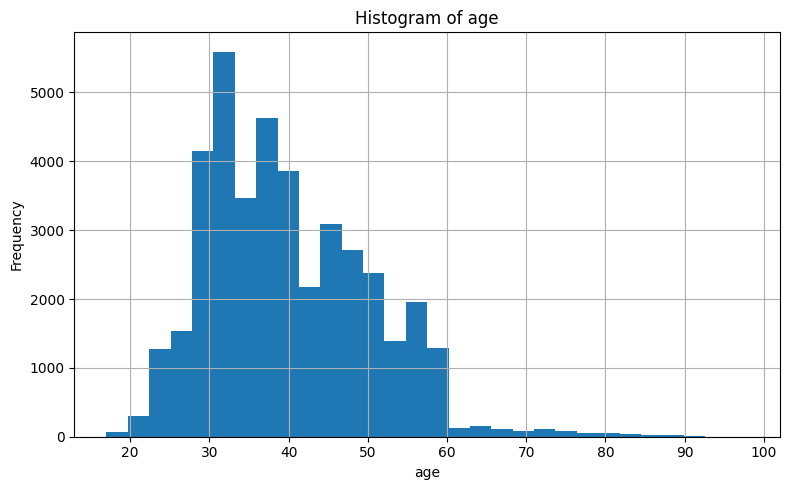

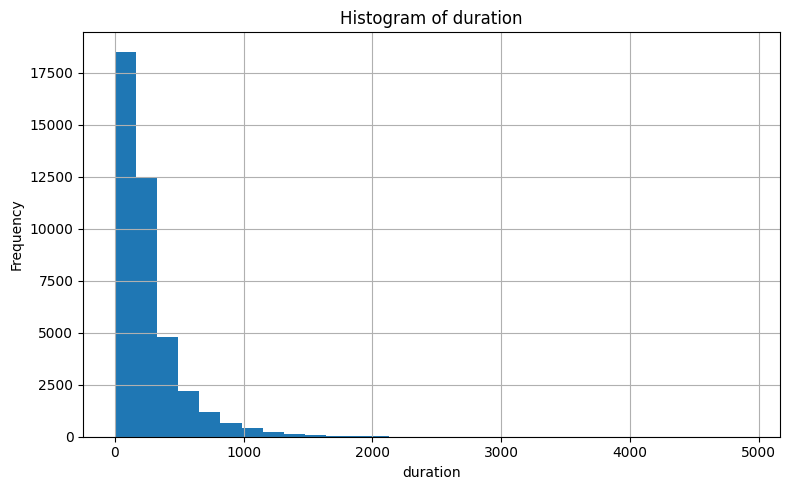

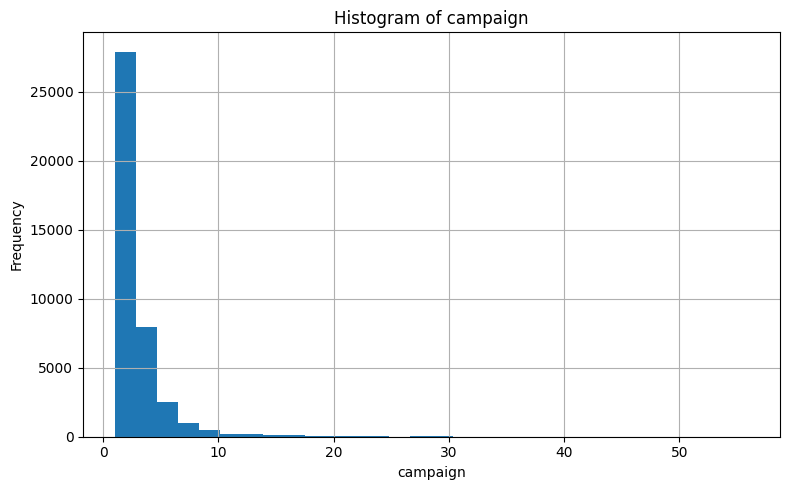

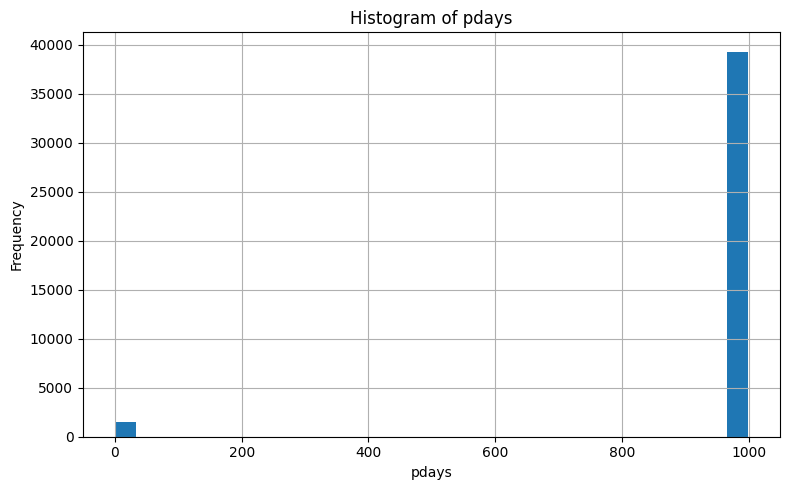

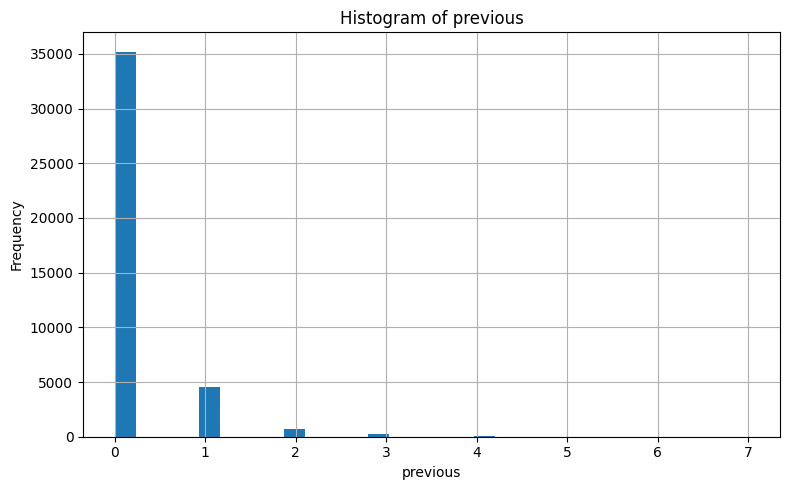

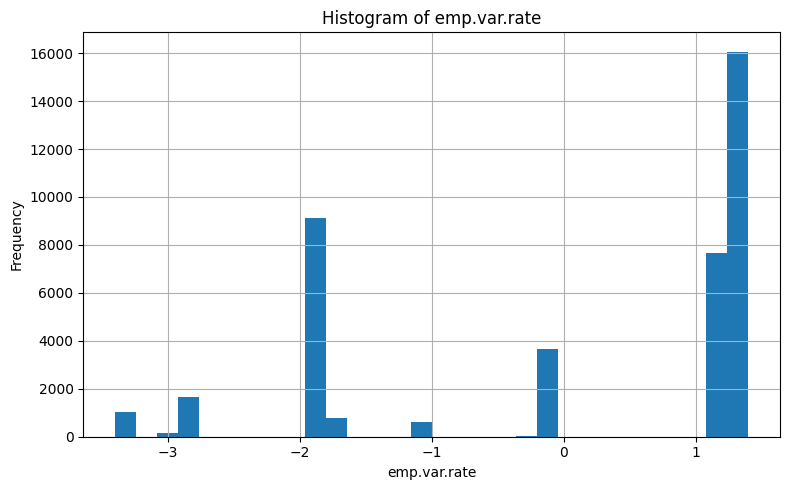

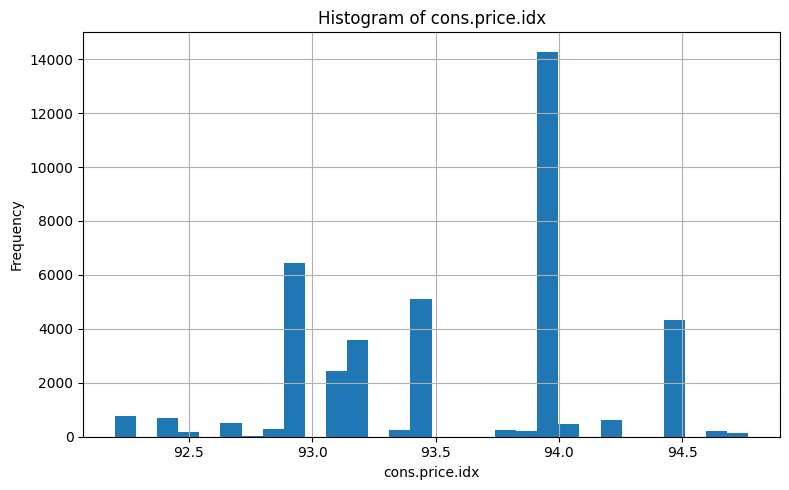

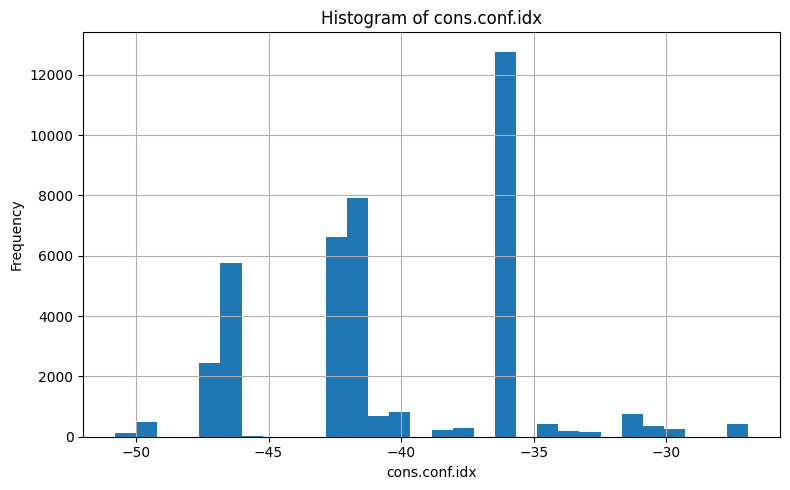

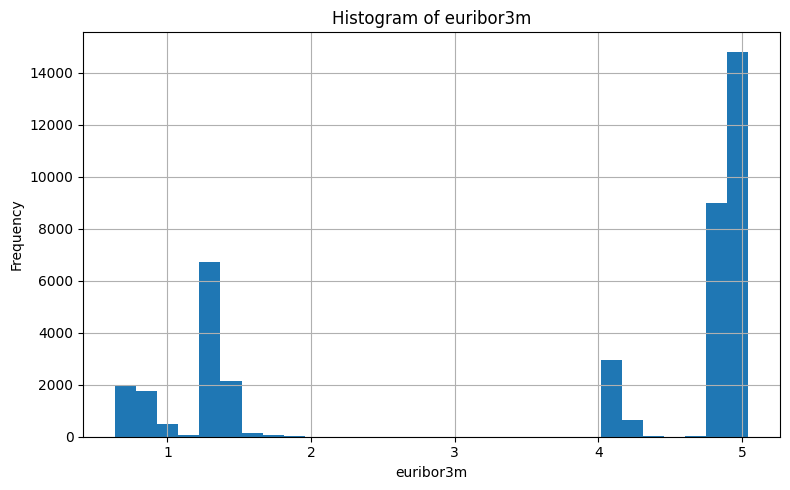

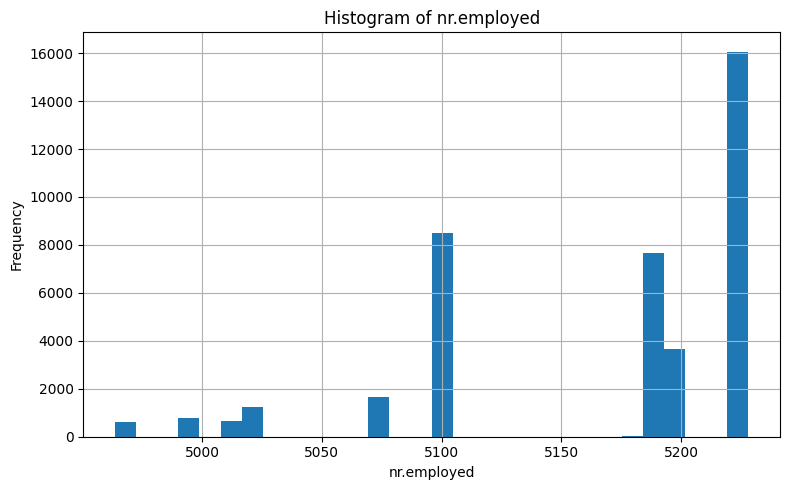

In [20]:
print("--- Displaying Histograms for Numerical Columns ---")

for col in numerical_columns:
  plt.figure(figsize=(8, 5)) # Create a new figure for each histogram
  df[col].hist(bins=30)
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show() # Display the plot


--- Displaying Box Plots for Outlier Analysis ---


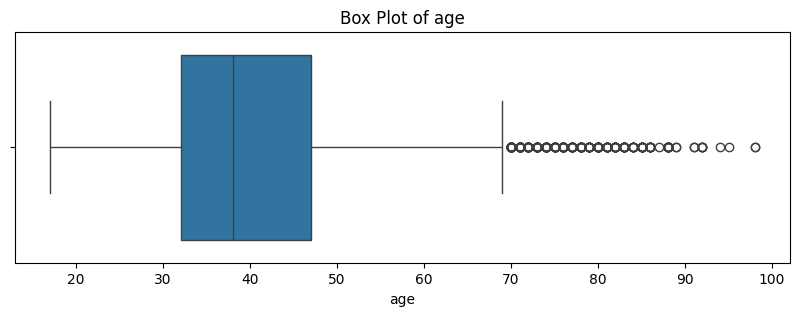

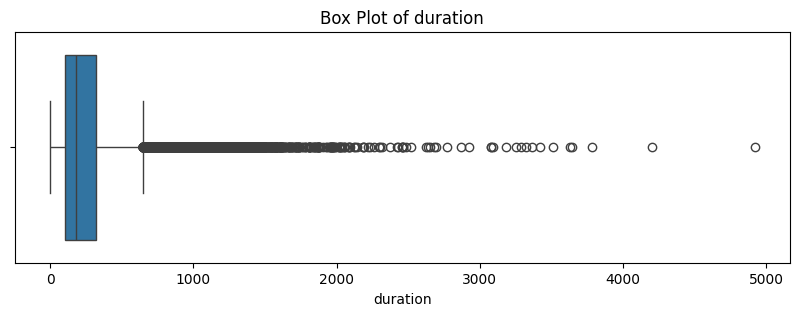

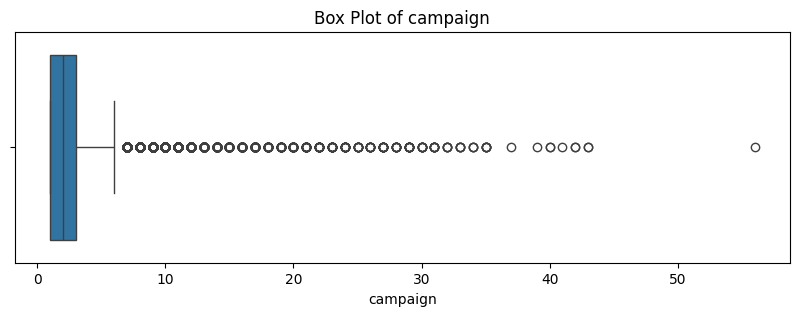

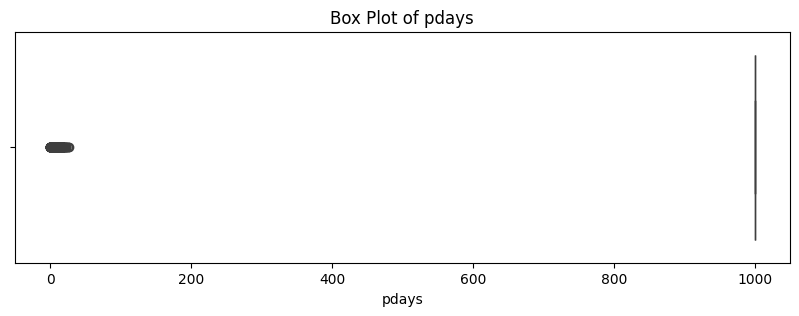

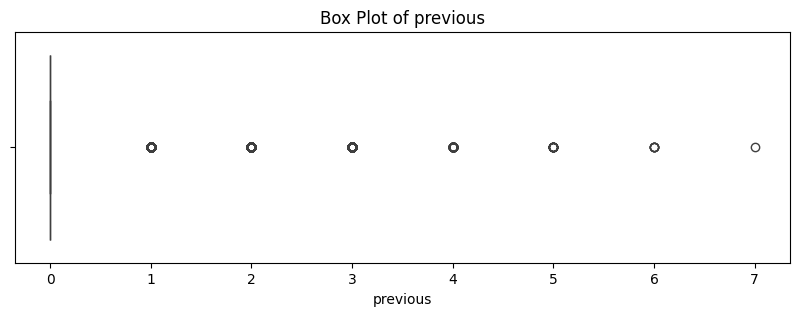

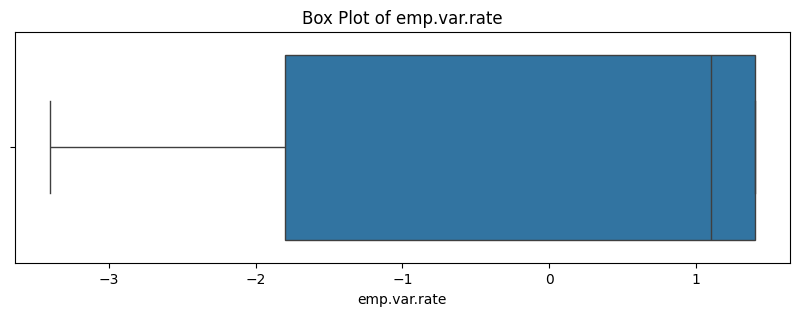

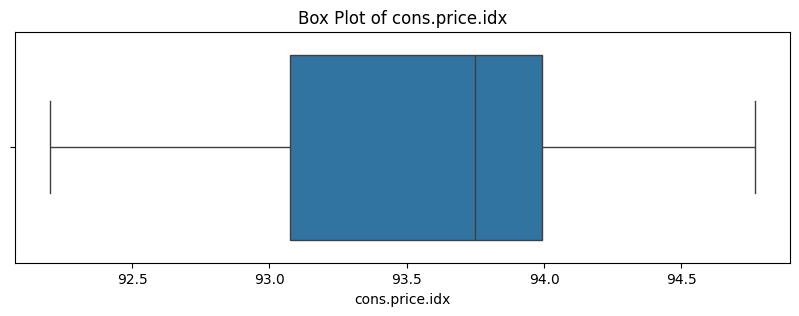

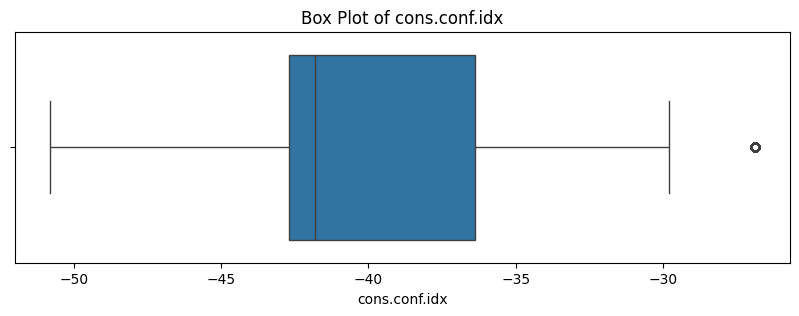

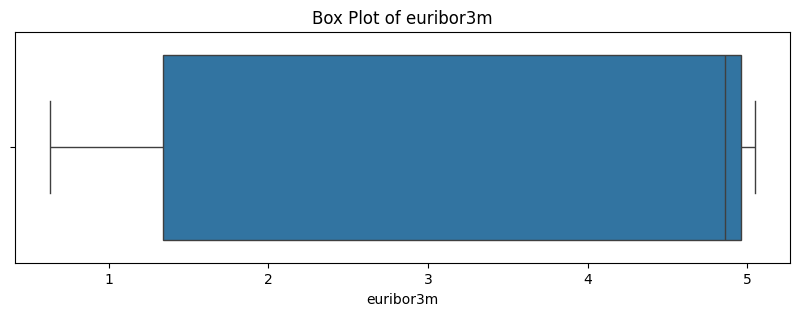

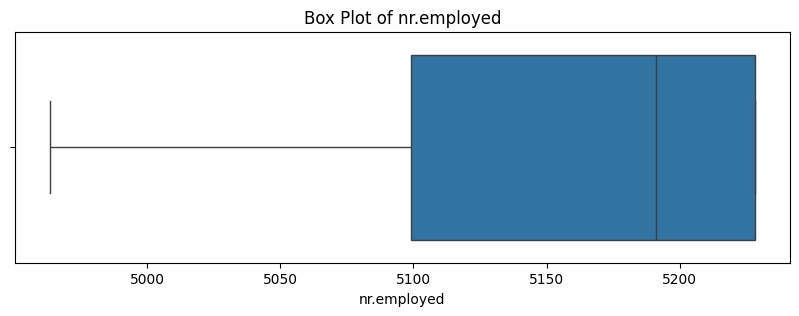

In [21]:
print("\n--- Displaying Box Plots for Outlier Analysis ---")
# Plot box plots for a clearer view of outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 3))  # Wide and short figure
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [24]:
# Create a new column: 0 if they were never contacted (999), 1 if they were contacted
df['previously_contacted'] = df['pdays'].apply(lambda x : 0 if x == 999 else 1)
df['pdays'] = df['pdays'].replace(999, -1)
df['pdays']

,pdays
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
41183,-1
41184,-1
41185,-1
41186,-1


In [25]:
# Drop 'duration' (Prevent Cheating)
# We drop this because we don't know the call duration before making the call
df = df.drop('duration', axis=1)

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'previously_contacted'],
      dtype='object')

# Cap 'campaign' column Outliers (Winsorization)

In [29]:
upper_limit = df['campaign'].quantile(0.99)
print(f"Capping 'campaign' at: {upper_limit} calls")

# Apply the cap
df['campaign'] = df['campaign'].apply(lambda x: upper_limit if x > upper_limit else x)


Capping 'campaign' at: 14.0 calls


# Encode Categoricals (One-Hot Encoding)

In [30]:
# This converts all text columns into numeric 1s and 0s
# drop_first=True helps prevent "multicollinearity" (a technical issue where columns duplicate info)

df_encoded = pd.get_dummies(df, drop_first=True)

In [31]:
df_encoded

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previously_contacted,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
1,57,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
2,37,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
3,40,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
4,56,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,-1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,True,False,False,False,False,False,False,True,False,True
41184,46,1.0,-1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,True,False,False,False,False,False,False,True,False,False
41185,56,2.0,-1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,True,False,False,False,False,False,False,True,False,False
41186,44,1.0,-1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,True,False,False,False,False,False,False,True,False,True


In [32]:
print("Data Cleaning Complete!")
print(f"New Data Shape: {df_encoded.shape}")
df_encoded.head()

Data Cleaning Complete!
New Data Shape: (40775, 49)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previously_contacted,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
1,57,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
2,37,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
3,40,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False
4,56,1.0,-1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,False,False,False,True,False,False,False,True,False,False


# Split your Data

In [34]:
# 1. Define X (Features) and y (Target)
X = df_encoded.drop('y_yes', axis=1)  # 'y_yes' is our target from One-Hot Encoding
y = df_encoded['y_yes']

# 2. Split the Data (Train = 80%, Test = 20%)
# random_state=42 ensures we get the same split every time (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32620, 48), (8155, 48), (32620,), (8155,))

# Scale the data (Standardization) i.e., Z-score scaling

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Split and Scaled!")
print(f"Training Shape: {X_train_scaled.shape}")
print(f"Testing Shape: {X_test_scaled.shape}")

Data Split and Scaled!
Training Shape: (32620, 48)
Testing Shape: (8155, 48)


In [39]:
X_train_scaled, X_test_scaled

(array([[-1.24233499, -0.65286475, -0.17295782, ..., -0.49530128,
         -2.49848977, -0.18698702],
        [-0.18847679,  1.52206204, -0.17295782, ..., -0.49530128,
          0.40024178, -0.18698702],
        [-0.47589266, -0.65286475, -0.17295782, ..., -0.49530128,
          0.40024178, -0.18698702],
        ...,
        [-0.95491912, -0.65286475, -0.17295782, ..., -0.49530128,
          0.40024178, -0.18698702],
        [ 0.9611867 , -0.65286475, -0.17295782, ..., -0.49530128,
          0.40024178, -0.18698702],
        [-0.76330853, -0.65286475, -0.17295782, ..., -0.49530128,
          0.40024178, -0.18698702]]),
 array([[-6.67503244e-01, -6.52864752e-01, -1.72957817e-01, ...,
         -4.95301279e-01,  4.00241782e-01, -1.86987025e-01],
        [-1.43394557e+00, -6.52864752e-01, -1.72957817e-01, ...,
          2.01897319e+00,  4.00241782e-01, -1.86987025e-01],
        [-9.26715002e-02,  2.17105967e-01,  4.39748403e+00, ...,
          2.01897319e+00, -2.49848977e+00,  5.34796466e+

# Train Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [41]:
y_pred_log = log_model.predict(X_test_scaled)

**Baseline Model:** Logistic Regression
Strategy: We started with Logistic Regression to establish a performance baseline. We used class_weight='balanced' to address the severe class imbalance (89% "No" vs. 11% "Yes").

**Result:** The model achieved a Recall of 63% but a low Precision of 36%.

**Analysis:** This model acts like an aggressive sales manager. It successfully identifies the majority of potential buyers (High Recall) but creates significant waste by flagging many uninterested people as leads (Low Precision). While it captures revenue, the high cost of wasted calls makes it inefficient for scaling.

In [42]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

       False       0.95      0.86      0.90      7236
        True       0.36      0.63      0.45       919

    accuracy                           0.83      8155
   macro avg       0.65      0.74      0.68      8155
weighted avg       0.88      0.83      0.85      8155



In [43]:
# --- MODEL 2: Decision Tree ( The Non-Linear Model ) ---
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train_scaled, y_train) # Note: Trees work okay with scaled data too

DecisionTreeClassifier(class_weight='balanced', random_state=42)

**Challenger Model:** Decision Tree
Strategy: We tested a single Decision Tree to see if a non-linear model could capture complex patterns that Logistic Regression missed.

**Result:** The model failed, dropping to 33% Recall and 30% Precision.

**Analysis:** The single tree suffered from overfitting. It likely memorized noise in the training data rather than learning true customer signals. It missed 67% of potential buyers, making it arguably worse than a random guess for business growth. We effectively "fired" this model.

In [44]:
y_pred_tree = tree_model.predict(X_test_scaled)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Results:
              precision    recall  f1-score   support

       False       0.91      0.90      0.91      7236
        True       0.30      0.33      0.31       919

    accuracy                           0.84      8155
   macro avg       0.61      0.61      0.61      8155
weighted avg       0.84      0.84      0.84      8155



***Why Random Forest?***

**The Problem:** A single tree is unstable and prone to errors (high variance).

**The Fix:** Random Forest builds 100+ trees, each looking at a different slice of the data. It aggregates their votes ("Wisdom of the Crowd") to make a final prediction.

**Goal:** We aim to maintain the Recall of Logistic Regression (finding the buyers) while significantly boosting Precision (reducing wasted calls). This balance is critical for maximizing ROI and team efficiency.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  class_weight='balanced',
                                  random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

***Champion Model: Random Forest***

**Strategy:** We deployed a Random Forest with 100 trees and class_weight='balanced' to stabilize predictions and improve precision over the baseline.

**Result:** The model achieved a Recall of 61% and a Precision of 40%, with an overall Accuracy of 85%.

**Analysis:** This model represents the best trade-off between "Revenue Capture" and "Operational Cost." It maintained the high recall of Logistic Regression (finding most buyers) while improving precision by 4%. This reduction in False Positives means the sales team wastes less time on uninterested leads compared to previous models.

***Performance Analysis: The "Precision Ceiling"***
**Question:** Why is the Precision capped at ~40% (and not 90%)?

**Answer:** Predicting human behavior in a cold-call scenario has an inherent "theoretical ceiling." We achieved 40% precision, which is industry-standard for this type of dataset. A 90% precision is statistically impossible with the current data features for two reasons:

**Data Limitations:** Our dataset contains only high-level demographic and campaign data (Age, Job, Previous Calls). We lack critical decision-making signals such as the client's real-time income, current debts, or immediate financial needs.

**Human Variance:** Buying decisions are often driven by emotional or external factors (e.g., "I'm in a bad mood" or "I just bought a car") that are invisible to the model.

**Conclusion:** The model has successfully optimized the controllable factors. To break the 50% barrier, we would need external third-party data enrichment (e.g., credit scores or spending habits).

In [47]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      7236
        True       0.40      0.61      0.48       919

    accuracy                           0.85      8155
   macro avg       0.67      0.75      0.70      8155
weighted avg       0.89      0.85      0.87      8155



***Business Intelligence: Drivers of Sales***
**Objective:** Identify the primary factors that influence a customer's decision to subscribe to a term deposit.

**Key Insight:** Macroeconomics > Demographics Our Feature Importance analysis revealed that market conditions are significantly stronger predictors of sales than customer identity.

**Top Predictor:** Interest Rates (euribor3m): The single biggest driver of sales is the national interest rate. Customers are highly sensitive to financial returns; when rates are favorable, conversion skyrockets regardless of the customer's age or job.

**Secondary Predictor:** Economic Health (nr.employed): The number of employed citizens is a strong proxy for consumer confidence. Customers buy when they feel the economy is safe.

**Top Behavioral Predictor:** Persistence (pdays): Among controllable factors, "Previous Contact" is the strongest driver. Retargeting warm leads yields significantly higher ROI than cold-calling new leads.

**Strategic Recommendation: Shift marketing budget allocation from "Demographic Targeting" (calling specific ages) to "Dynamic Scheduling" (calling aggressively when interest rates are favorable).**

/tmp/ipython-input-1656542666.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


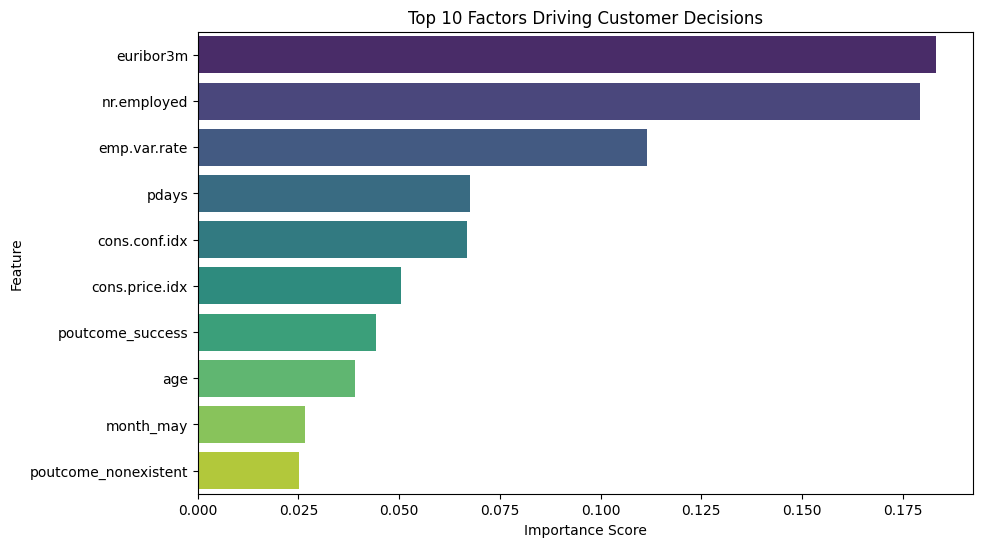

In [48]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a Dataframe for visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Top 10 Factors Driving Customer Decisions')
plt.xlabel('Importance Score')
plt.show()